In [1]:
using Revise, Plots, Interact
using EAMC

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2167896429641872838\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-3118990715761841144\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2167896429641872838\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6617962136752218061\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11107078264915039674\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6617962136752218061\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [101]:
bj=EAMC.BickleyJet()#(nx=30, ny=8)
nx = bj.nx
ny = bj.ny
n  = nx * ny
nt = 12
bj,n

(EAMC.BickleyJet
  xmin: Float64 -20.015086796020572
  xmax: Float64 20.015086796020572
  ymin: Float64 -3.0
  ymax: Float64 3.0
  nx: Int64 120
  ny: Int64 36
  U0: Float64 5.4138
  L: Float64 1.77
  c2: Float64 1.109829
  c3: Float64 2.4957618000000004
  A2: Float64 0.1
  A3: Float64 0.3
  k2: Float64 0.6278449223041909
  k3: Float64 0.9417673834562862
, 4320)

In [3]:
qs=[EAMC.generator(t, bj) for t in range(0, length=nt)];

In [9]:
g=EAMC.galerkin(qs, ones(nt)*10)

51840×51840 SparseArrays.SparseMatrixCSC{Float64,Int64} with 664560 stored entries:
  [120  ,     1]  =  0.757029
  [121  ,     1]  =  0.0190784
  [1    ,     2]  =  0.768502
  [122  ,     2]  =  0.0557753
  [2    ,     3]  =  0.756375
  [123  ,     3]  =  0.0902172
  [3    ,     4]  =  0.73491
  [124  ,     4]  =  0.121697
  [4    ,     5]  =  0.702311
  [125  ,     5]  =  0.148799
  [5    ,     6]  =  0.656494
  [126  ,     6]  =  0.168939
  ⋮
  [25919, 51840]  =  7.34712e-7
  [30120, 51840]  =  1.46038e-7
  [30239, 51840]  =  1.08892e-5
  [34440, 51840]  =  1.47533e-5
  [34559, 51840]  =  0.000387613
  [38760, 51840]  =  0.000120089
  [38879, 51840]  =  0.00222113
  [43080, 51840]  =  0.00238119
  [43199, 51840]  =  0.0237915
  [47400, 51840]  =  0.0763134
  [47519, 51840]  =  0.321623
  [51720, 51840]  =  0.177543
  [51839, 51840]  =  0.534809

In [71]:
A = EAMC.commitors(g, n);
A

56160×56160 SparseArrays.SparseMatrixCSC{Float64,Int64} with 772560 stored entries:
  [1    ,     1]  =  -1.0
  [120  ,     1]  =  0.757029
  [121  ,     1]  =  0.0190784
  [1    ,     2]  =  0.768502
  [2    ,     2]  =  -1.0
  [122  ,     2]  =  0.0557753
  [2    ,     3]  =  0.756375
  [3    ,     3]  =  -1.0
  [123  ,     3]  =  0.0902172
  [3    ,     4]  =  0.73491
  [4    ,     4]  =  -1.0
  [124  ,     4]  =  0.121697
  ⋮
  [4320 , 56160]  =  1.50106e-13
  [8640 , 56160]  =  1.39863e-12
  [12960, 56160]  =  2.78007e-11
  [17280, 56160]  =  2.3033e-10
  [21600, 56160]  =  8.55856e-9
  [25920, 56160]  =  1.63542e-7
  [30240, 56160]  =  2.21524e-6
  [34560, 56160]  =  9.27159e-5
  [38880, 56160]  =  0.000581095
  [43200, 56160]  =  0.00511417
  [47520, 56160]  =  0.0865678
  [51840, 56160]  =  0.546384
  [56160, 56160]  =  1.0

In [80]:
c = @time EAMC.commitors(g, n)
cc = reshape(c, nx, ny, nt+1, nx, ny)

 70.948321 seconds (209.84 k allocations: 38.791 GiB, 18.32% gc time)


120×36×13×120×36 Array{Float64,5}:
[:, :, 1, 1, 1] =
 1.53145e-8   3.82888e-8   9.62295e-8   …  8.72882e-11  2.06145e-11
 1.4117e-8    3.38069e-8   8.51025e-8      1.97875e-10  5.1422e-11 
 1.28644e-8   2.98622e-8   7.574e-8        2.84283e-10  8.07161e-11
 1.18125e-8   2.67954e-8   6.87301e-8      2.8843e-10   8.61249e-11
 1.10149e-8   2.45881e-8   6.41155e-8      2.42054e-10  7.3697e-11 
 1.0435e-8    2.31503e-8   6.20572e-8   …  1.89812e-10  5.79198e-11
 1.00978e-8   2.26746e-8   6.36952e-8      1.49712e-10  4.56096e-11
 1.02104e-8   2.40358e-8   7.23784e-8      1.21978e-10  3.74586e-11
 1.12092e-8   2.94777e-8   9.62795e-8      9.93141e-11  3.13328e-11
 1.4792e-8    4.59441e-8   1.57277e-7      7.5234e-11   2.46479e-11
 2.7046e-8    9.36704e-8   3.08586e-7   …  5.24782e-11  1.78427e-11
 6.49125e-8   2.16444e-7   6.42446e-7      3.60126e-11  1.27902e-11
 1.28613e-7   3.96534e-7   1.0747e-6       2.46857e-11  9.01881e-12
 ⋮                                      ⋱               ⋮      

In [81]:
@manipulate for x=slider(1:nx, label="x"), y=slider(1:ny, label="y"), t=slider(1:nt, label="t")
heatmap(cc[:,:,t,x,y]', title="Commitor von (x=$x,y=$y,t=24) zum zeitpunkt t=$t")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 120,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
60, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alex/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000112cf0490, Task (runnable) @0x0000000112cf0490), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"

In [115]:
using LinearAlgebra
tcluster = 1
M = reshape(cc[:,:,tcluster,:,:], n, n)

M = M' * M
#M = M - Diagonal(M)
M = M ./ sum(M, dims=2);

In [264]:
include("src/pccap.jl")
ps = []
ncs = 2:11
for nc in ncs
    
    p = pccap(M, nc,optimize=true)
    # now sort by cluster size
    p = p[:,sortperm(sum(p, dims=1)|>vec, rev=true)];
    push!(ps, p)
end

In [265]:
@manipulate for nc in ncs
    crisp = reshape(crispassignments(ps[nc-1]), nx, ny)
    heatmap(crisp', title="n=$nc")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["nc"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 11,:min => 2,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
6, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alex/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001156a86d0, Task (runnable) @0x00000001156a86d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"13284011478169580935\",\"id\":\"ob_132\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"132840114

In [294]:
cc[:,:,1,:,:] * reshape(ps[8][:,1], 1, 1, nx, ny)

MethodError: MethodError: no method matching *(::Array{Float64,4}, ::Array{Float64,4})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  *(!Matched::MutableArithmetics.Zero, ::Any) at /Users/alex/.julia/packages/MutableArithmetics/7uuZk/src/rewrite.jl:49
  *(!Matched::Number, ::AbstractArray) at arraymath.jl:52
  ...

In [287]:
@manipulate for cl=1:9, t=1:13
    reshape(reshape(cc[:,:,t,:,:], n, n) * ps[8][:,cl], nx, ny)' |> heatmap
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["cl"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 9,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alex/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alex/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alex/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001156a9f90, Task (runnable) @0x00000001156a9f90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"2298522113266465890\",\"id\":\"ob_142\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"2298522113266465890

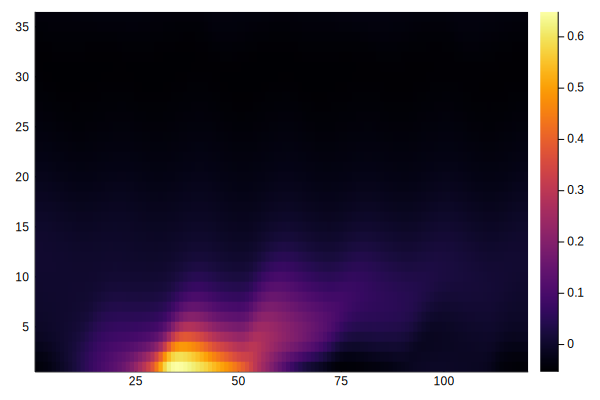

In [272]:
heatmap(reshape(ps[8][:,6], nx, ny)')

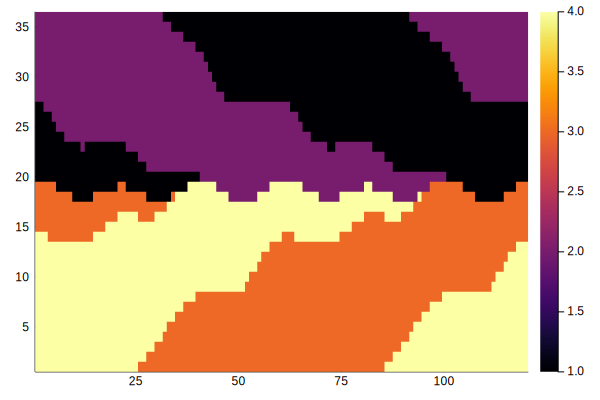

In [116]:
pccap(M, 4, optimize=true) |> x->reshape(crispassignments(x), nx, ny)' |> heatmap

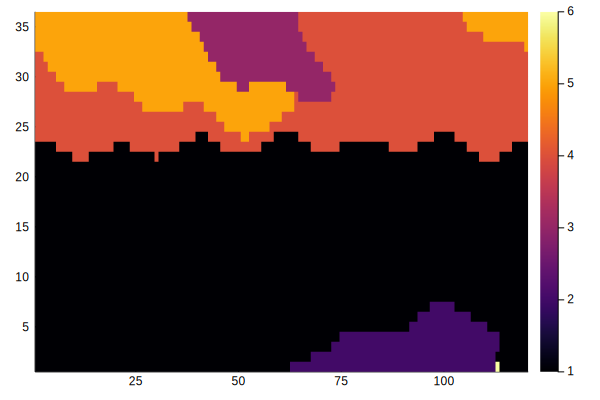

In [117]:
pccap(M, 6, optimize=true) |> x->reshape(crispassignments(x), nx, ny)' |> heatmap

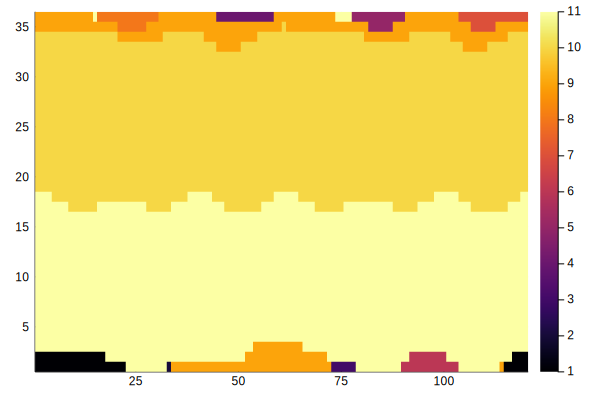

In [118]:
pccap(M, 11, optimize=true) |> x->reshape(crispassignments(x), nx, ny)' |> heatmap

In [127]:
function gramschmidt!(r, rs)
    for n in rs
        r .= r - dot(r,n) / dot(n,n) * n
    end
end

gramschmidt! (generic function with 1 method)

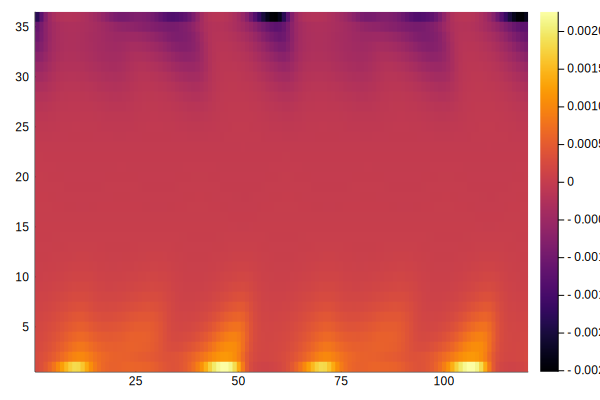

In [168]:
rs=[]
for j=1:5
    r = rand(size(M,1))'
    for i=1:30
        gramschmidt!(r, rs)
        r = r*M
        r = r ./ norm(r, 1)
    end
    push!(rs, r)
end
rs


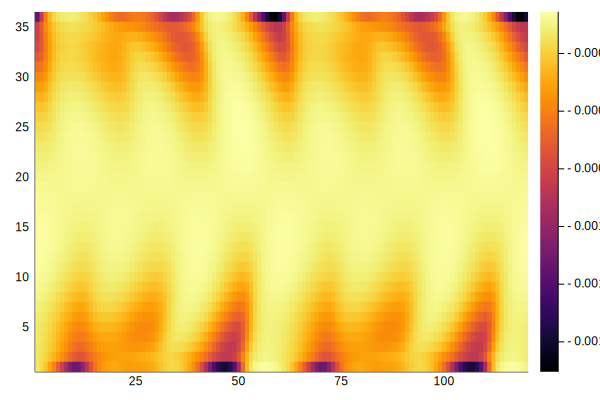

In [244]:
reshape(-rs[1], nx, ny)' |> heatmap

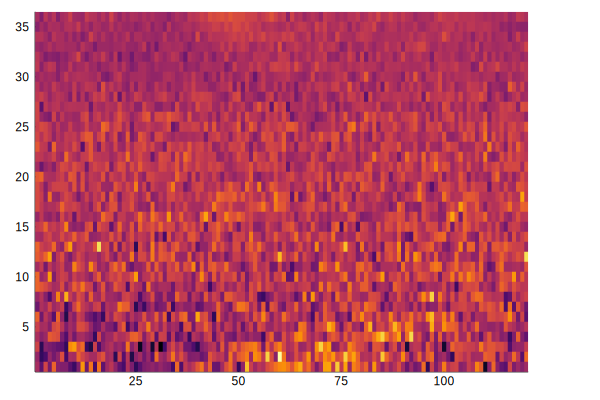

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
origin outside current window


In [167]:
eigs(M, nev=1, which=:LM)[2] |> real |> x->reshape(x, nx, ny)' |> heatmap

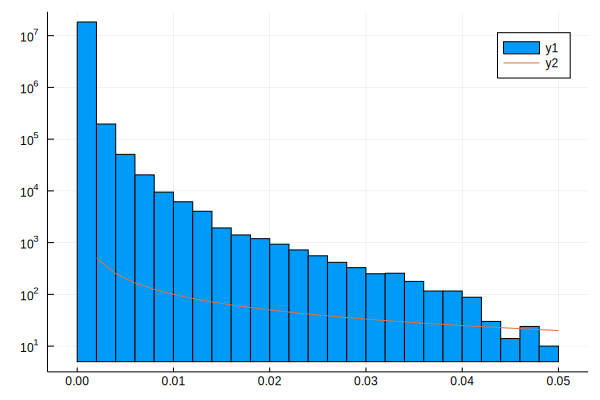

In [211]:
using StatsBase
f=fit(Histogram, cc[:,:,1,:,:] |> vec)
plot(f, yaxis=:log)
plot!(f.edges, x->1/x)

In [240]:
s=svd(reshape(cc[:,:,6,:,:], n, n))

SVD{Float64,Float64,Array{Float64,2}}
U factor:
4320×4320 Array{Float64,2}:
 -0.0236105    0.00786187  0.000667129  …  -6.00697e-8    5.56335e-8 
 -0.0228829    0.00761752  0.00198621       3.93446e-8   -3.64358e-8 
 -0.0221324    0.00736606  0.00335875      -2.24787e-8    2.08147e-8 
 -0.0214232    0.00712937  0.00478861       1.30721e-8   -1.21021e-8 
 -0.0208287    0.00693245  0.00628366      -8.56247e-9    7.92418e-9 
 -0.0204161    0.00679779  0.00787791   …   6.02752e-9   -5.57529e-9 
 -0.0202837    0.00675883  0.00967819      -4.10516e-9    3.79535e-9 
 -0.020583     0.0068664   0.0120152        2.63004e-9   -2.4308e-9  
 -0.0214396    0.00716647  0.0149835       -1.61759e-9    1.49609e-9 
 -0.0228289    0.00765432  0.0185261        1.06268e-9   -9.85761e-10
 -0.0246183    0.00828573  0.0224808    …  -8.30945e-10   7.74057e-10
 -0.0266502    0.00900564  0.0266512        7.16194e-10  -6.68934e-10
 -0.0288193    0.00977583  0.0309094       -5.74646e-10   5.37521e-10
  ⋮           

In [242]:
for i=1:20
    plot(heatmap(reshape(s.U[:,i], nx, ny)'), heatmap(reshape(s.V[:,i], nx, ny)'), layout=(2,1), title="$i $(s.D[i,i])") |> display
end

ErrorException: type SVD has no field D

In [243]:
s.D

ErrorException: type SVD has no field D

In [263]:
?ones

search: ones leading_ones trailing_ones coefnames countlines count_ones



```
ones([T=Float64,] dims...)
```

Create an `Array`, with element type `T`, of all ones with size specified by `dims`. See also: [`fill`](@ref), [`zeros`](@ref).

# Examples

```jldoctest
julia> ones(1,2)
1×2 Array{Float64,2}:
 1.0  1.0

julia> ones(ComplexF64, 2, 3)
2×3 Array{Complex{Float64},2}:
 1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im
```
